In [100]:
import pandas as pd
import numpy as np
import networkx as nx
import graph as gr
import utils as ut
import feature_selection as fs
import classification as cl
import os.path
import matplotlib.pyplot as plt
from pprint import pprint
import importlib
import community
import seaborn as sns
from gensim.models import KeyedVectors
from pyemd import emd
from gensim import corpora
from nltk.corpus import stopwords
from gensim.matutils import softcossim
import copy
import itertools
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation, Reshape
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import load_model
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

In [8]:
domain = ['apnea','obesity']
filepath=['dataset/apnea-all,3.csv',
         'dataset/apnea-distinct_keyword.csv']
graphpath='C:/Users/faisal/PycharmProjects/linkPrediction/graphs'
datapath='C:/Users/faisal/PycharmProjects/linkPrediction/dataframes'
modelpath='C:/Users/faisal/PycharmProjects/linkPrediction/models'
column_split=['keyword','author_name','affiliation_1','affiliation_2','country']
#time=[parent_start_year, train_start_year, test_start_year, total_test_period_in_year, total_year_in_each_iteration]
time=[1991,1991,1996,1,1,20]
df, key_list = ut.load_dataset(filepath, column_split)

In [40]:
#dynamic train graphs and test graph build and save in disk 
importlib.reload(gr)
time=[2004,2005,2015,1,1,20]
gr.dynamic_train_test_graph_build(df, key_list, graphpath, time)

65
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1992.gpickle saved, nodes: 44 edges: 27
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1993.gpickle saved, nodes: 47 edges: 26
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\test_graph_1994.gpickle saved, nodes: 65 edges: 56
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\parent_graph_1991-1992.gpickle saved, nodes: 24 edges: 20
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1992-1994.gpickle saved, nodes: 65 edges: 51
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\test_graph_1994-1995.gpickle saved, nodes: 65 edges: 56
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1992.gpickle loaded, nodes: 44 edges: 27
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1993.gpickle loaded, nodes: 47 edges: 26
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\test_graph_1994.gpickle loaded, nodes: 65 edges: 56
C:/Users/faisal/PycharmProj

In [45]:
time=[2004,2005,2015,1,1,20]
g_train, g_test, g_parent, g_train_static, g_test_static = gr.graph_load(graphpath, time)
importlib.reload(fs)
importlib.reload(cl)
freq=10
#time=[2001,2007,2015,1,1,10]
train_data, train_data_static, parent_data, test_data_static, edge_list = cl.non_edge_feature_dataframe(g_train, 
                                                                                                         g_test,
                                                                                                         g_parent,
                                                                                                         g_train_static, 
                                                                                                         g_test_static,  
                                                                                                         time, 
                                                                                                         freq)
node_feature, train_data = fs.dynamic_graph_feature_set(df, key_list, train_data, g_parent, g_train, g_train_static, time)

C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2005.gpickle loaded, nodes: 70 edges: 47
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2006.gpickle loaded, nodes: 79 edges: 56
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2007.gpickle loaded, nodes: 400 edges: 699
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2008.gpickle loaded, nodes: 459 edges: 773
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2009.gpickle loaded, nodes: 470 edges: 688
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2010.gpickle loaded, nodes: 496 edges: 786
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2011.gpickle loaded, nodes: 536 edges: 977
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2012.gpickle loaded, nodes: 584 edges: 1054
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_2013.gpickle loaded, nodes: 634 edges: 1280
C:/Users/faisal/Pycha

C:\Users\faisal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\faisal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\faisal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\faisal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\faisal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to

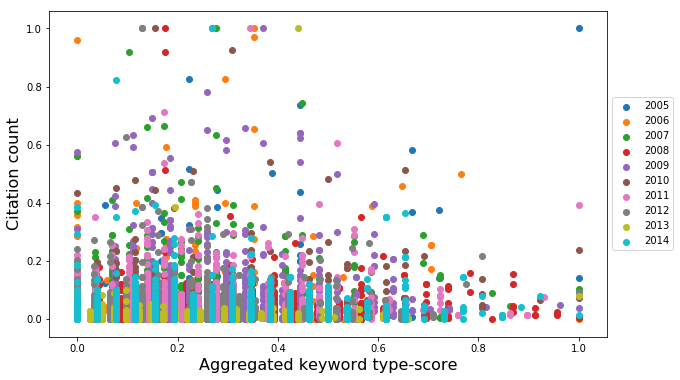

In [146]:
ts = time[1]
te = time[2]
citation_all=[]
type_all =[]
type_n ={20:5,5:4,3:3,1:2}
plt.figure(figsize=(10,6))
for t in range(ts,te,1):
    nodes = set(list(node_feature[t]['node_index']))
    types= dict(zip(node_feature[t]['node_index'], node_feature[t]['node_type_aut']))
    citation = list(df[(df['art_year']==t)]['citation'])
    keywords = list(df[(df['art_year']==t)]['keyword'])
    type_score = []
    for keys in keywords:
        type_val = 0
        for key in keys:
            key_id = gr.node_key_find(key_list,key)
            if key_id in nodes:
                type_val= type_val+ type_n[types[key_id]]
            else:
                type_val= type_val+1
        type_score.append(type_val)
    type_score = np.asarray(type_score)
    type_score = type_score.reshape((len(type_score), 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(type_score)
    normalized_type = scaler.transform(type_score)

    citation = np.asarray(citation)
    citation = citation.reshape((len(citation), 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(citation)
    normalized_citation = scaler.transform(citation)
    plt.scatter(normalized_type,normalized_citation,label=t)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     citation_all.extend(citation)
#     type_all.extend(type_score)
#plt.suptitle('Citation', fontsize=20)
plt.xlabel('Aggregated keyword type-score', fontsize=16)
plt.ylabel('Citation count', fontsize=16)
fig_name = "citation_type_correlation_apnea_"+str(ts)+"-"+str(te-1)
fig_file_name = os.path.join(datapath, fig_name + ".png")
plt.savefig(fig_file_name)
plt.show()